In [2]:
import simulator as sim
import generator as gen
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as c
import scipy.signal.windows as w

hbar = c.hbar
muB = c.value('Bohr magneton')

# Bloch sphere states
up = np.array([[1], [0]], dtype=complex)
down = np.array([[0], [1]], dtype=complex)
plus_i = 1/np.sqrt(2) * np.array([[1], [1.0j]], dtype=complex)
minus_i = 1/np.sqrt(2) * np.array([[1], [-1.0j]], dtype=complex)

# Window Fucntions

A simple and efficient method of pulse shaping would be to chose a window function (other than the typical rectangular window) that has desireable properties. For example, Yi-Hsien Wu from Riken presented a poster at SiQEW 24 outlining the use of a Kaiser window to improve single qubit fidelity. The idea is that the Kaiser window (or similarly shaped window functions) will limit cross-talk effects since they have less spectral leakage. Not only would this improve simultaneous driving of multiple qubits, but they also claim it limits gate-dependent PSB error.

The Kaiser window is described by the function:

\begin{equation}
w[n] = \frac{I_0 \left( \pi \beta \sqrt{1 - \left( \frac{2n}{N}-1 \right)^2} \right) }{I_0(\pi \beta)}
\end{equation}

where $\beta$ parameterises width of the window.

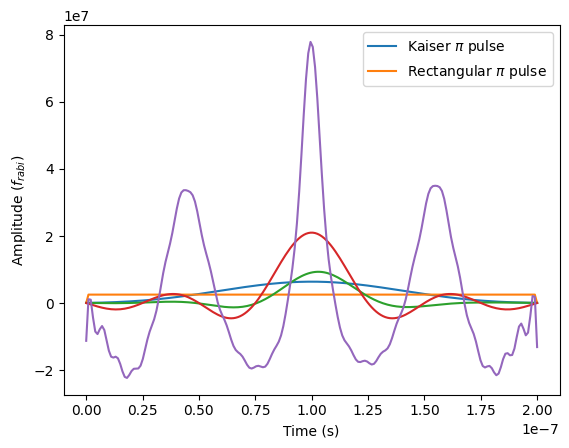

In [13]:
tau = 200e-9
N = 200
times = np.linspace(0, tau, N)
g = 2
gamma = g*muB/hbar


# Define Kaiser window function
beta = 7
kaiser_window = 0.91e-3/2 * w.kaiser(N, beta)
square_window = 0.358e-3/2 * np.ones(np.shape(times))

slr_window = gen.generateSLRPulse(g, tau, 1e9, 40e6, 'pi/2', 'pm', plot_output=False)
sinc_window = 1.5e-3 *np.sinc(40e6*(tau/2 - times))
shaped_window = 2 * np.genfromtxt('Xpi2_200_supressed.csv', delimiter=',') / gamma


# Edit square pulse to look nice in plot
square_window_plotting = np.copy(square_window)
square_window_plotting[0] = 0
square_window_plotting[-1] = 0

plt.plot(times, sim.predictRabi(kaiser_window, g), label = r'Kaiser $\pi$ pulse')
plt.plot(times, sim.predictRabi(square_window_plotting, g), label = r'Rectangular $\pi$ pulse')
plt.plot(times, sim.predictRabi(slr_window, g))
plt.plot(times, sim.predictRabi(sinc_window, g))
plt.plot(times, sim.predictRabi(shaped_window,g))
plt.xlabel('Time (s)')
plt.ylabel(r'Amplitude $(f_{rabi})$')
plt.legend()
plt.show()

In [14]:
detunings = np.linspace(-50e6, 50e6, 500)

# sim.simulateBlochSphere(up, b1, g, tau, 0)
k_spectrum = sim.projectionSpectrum(up, kaiser_window, g, tau, detunings, down, plot_output=False)
s_spectrum = sim.projectionSpectrum(up, square_window, g, tau, detunings, down, plot_output=False)
# sinc_spectrum = sim.projectionSpectrum(up, sinc_window, g, tau, detunings, down, plot_output=False)
# slr_spectrum = sim.projectionSpectrum(up, slr_window, g, tau, detunings, down, plot_output=False)
shaped_spectrum = sim.projectionSpectrum(up, shaped_window, g, tau, detunings, down, plot_output=False, interpolate=True)

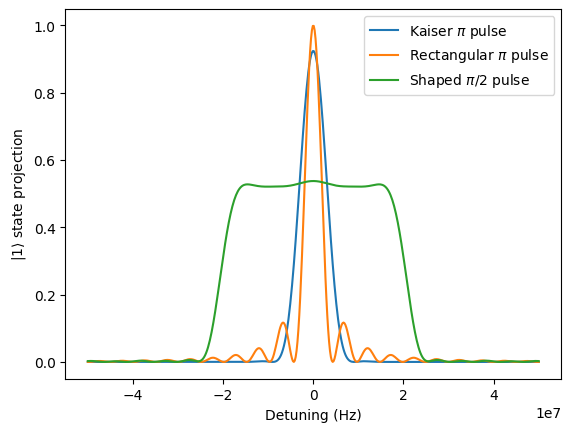

In [15]:
plt.plot(detunings, k_spectrum, label = r'Kaiser $\pi$ pulse')
plt.plot(detunings, s_spectrum, label = r'Rectangular $\pi$ pulse')
# plt.plot(detunings, sinc_spectrum)
# plt.plot(detunings, slr_spectrum, label = r'SLR $\pi/2$ pulse')
plt.plot(detunings, shaped_spectrum, label = r'Shaped $\pi/2$ pulse')
plt.xlabel('Detuning (Hz)')
plt.ylabel(r'$| 1 \rangle $ state projection')
# plt.yscale('log')
plt.legend()
plt.show()

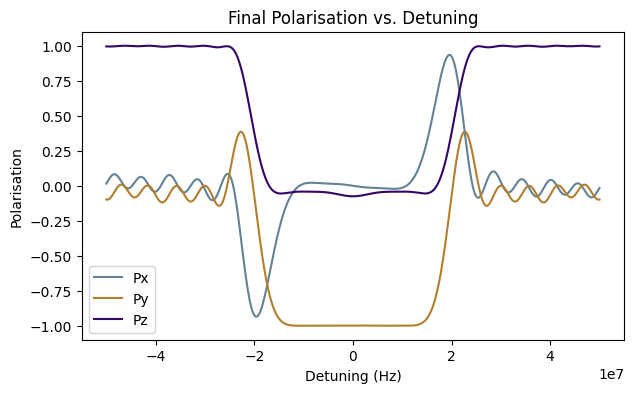

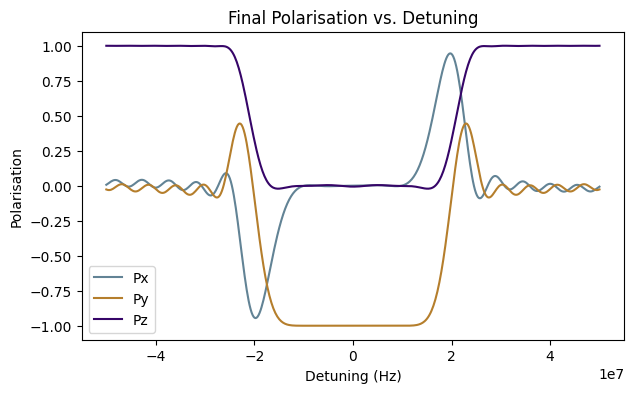

In [16]:
sim.polarisationSpectrum(up, shaped_window, g, tau, detunings, interpolate=True)
sim.polarisationSpectrum(up, shaped_window, g, tau, detunings, interpolate=False)
plt.show()